# Econometrics_Project | Decision Tree on WVS Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

#Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score, accuracy_score, f1_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

#for tuning the model
from sklearn.model_selection import GridSearchCV

#to ignore warnings
## import warnings
## warnings.filterwarnings("ignore")

from sklearn.preprocessing import OrdinalEncoder

In [2]:
#reading the dataset
df = pd.read_csv('C:/Users/ASUS/Downloads/econ_data.csv')
df

,Unnamed: 0,B_COUNTRY,A_YEAR,FW_START,FW_END,K_DURATION,Q_MODE,G_TOWNSIZE2,H_SETTLEMENT,H_URBRURAL,...,Q274,Q275,Q279,Q284,Q285,Q286,Q287,Q288,Q289,K_START_DAYTIME
0,0,20,2018,7,9,88,2,3,1,1,...,2,3,1,2,2,3,3,5,1,2
1,1,20,2018,7,9,85,2,2,2,1,...,0,7,1,2,1,1,2,9,1,1
2,2,20,2018,7,9,30,2,2,2,1,...,0,7,1,2,1,2,3,5,1,1
3,3,20,2018,7,9,75,2,2,2,1,...,1,2,1,2,2,2,4,4,0,2
4,4,20,2018,7,9,89,2,2,2,1,...,0,2,1,2,1,1,4,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75951,76892,716,2020,2,3,77,1,1,5,2,...,2,1,7,-3,2,2,3,5,1,1
75952,76893,716,2020,2,3,80,1,1,5,2,...,1,6,1,3,1,1,2,5,2,1
75953,76894,716,2020,2,3,59,1,1,5,2,...,1,2,7,2,2,2,4,5,1,1
75954,76895,716,2020,2,3,83,1,1,5,2,...,6,2,3,2,1,2,4,1,1,1


In [3]:
# df1 = df[df.Q57 > 0]

In [4]:
# df1.shape

In [5]:
df.info

<bound method DataFrame.info of        Unnamed: 0  B_COUNTRY  A_YEAR  FW_START  FW_END  K_DURATION  Q_MODE  \
0               0         20    2018         7       9          88       2   
1               1         20    2018         7       9          85       2   
2               2         20    2018         7       9          30       2   
3               3         20    2018         7       9          75       2   
4               4         20    2018         7       9          89       2   
...           ...        ...     ...       ...     ...         ...     ...   
75951       76892        716    2020         2       3          77       1   
75952       76893        716    2020         2       3          80       1   
75953       76894        716    2020         2       3          59       1   
75954       76895        716    2020         2       3          83       1   
75955       76896        716    2020         2       3          86       1   

       G_TOWNSIZE2  H_SETTLEMEN

In [6]:
df.describe()

,Unnamed: 0,B_COUNTRY,A_YEAR,FW_START,FW_END,K_DURATION,Q_MODE,G_TOWNSIZE2,H_SETTLEMENT,H_URBRURAL,...,Q274,Q275,Q279,Q284,Q285,Q286,Q287,Q288,Q289,K_START_DAYTIME
count,75956.000000,75956.000000,75956.000000,75956.000000,75956.000000,75956.000000,75956.000000,75956.000000,75956.000000,75956.000000,...,75956.000000,75956.000000,75956.000000,75956.000000,75956.000000,75956.000000,75956.000000,75956.000000,75956.000000,75956.000000
mean,38435.542972,418.431394,2018.487295,3.449089,3.643688,79.105535,1.748828,2.808626,2.936503,1.190531,...,1.706606,3.458239,3.074912,0.677234,1.468561,1.937938,3.179091,4.661528,2.972194,1.449826
std,22201.666543,252.315605,1.018949,2.681726,2.719020,420.763180,0.863299,2.010754,1.872251,0.975539,...,1.803765,2.075897,2.118054,2.093556,0.793678,1.082007,1.200217,2.268169,2.691456,0.542351
min,0.000000,20.000000,2017.000000,0.000000,0.000000,-5.000000,1.000000,-5.000000,-5.000000,-5.000000,...,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,0.000000
25%,19196.750000,158.000000,2018.000000,1.000000,1.000000,28.000000,1.000000,2.000000,2.000000,1.000000,...,0.000000,2.000000,1.000000,-1.000000,1.000000,1.000000,3.000000,3.000000,1.000000,1.000000
50%,38444.500000,398.000000,2018.000000,3.000000,3.000000,49.000000,2.000000,3.000000,3.000000,1.000000,...,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000,5.000000,2.000000,1.000000
75%,57623.250000,642.000000,2020.000000,6.000000,6.000000,65.000000,2.000000,4.000000,5.000000,2.000000,...,3.000000,5.000000,5.000000,2.000000,2.000000,2.000000,4.000000,6.000000,5.000000,2.000000
max,76896.000000,840.000000,2020.000000,9.000000,9.000000,9999.000000,5.000000,5.000000,5.000000,2.000000,...,24.000000,8.000000,8.000000,3.000000,2.000000,4.000000,5.000000,10.000000,9.000000,2.000000


In [7]:
df.columns

Index(['Unnamed: 0', 'B_COUNTRY', 'A_YEAR', 'FW_START', 'FW_END', 'K_DURATION',
       'Q_MODE', 'G_TOWNSIZE2', 'H_SETTLEMENT', 'H_URBRURAL', 'E1_LITERACY',
       'Q57', 'Q58', 'Q59', 'Q60', 'Q61', 'Q62', 'Q63', 'Q64', 'Q65', 'Q66',
       'Q67', 'Q68', 'Q69', 'Q70', 'Q71', 'Q72', 'Q73', 'Q74', 'Q75', 'Q76',
       'Q77', 'Q78', 'Q79', 'Q80', 'Q81', 'Q82', 'Q83', 'Q84', 'Q85', 'Q86',
       'Q87', 'Q88', 'Q89', 'Q94', 'Q95', 'Q96', 'Q97', 'Q98', 'Q99', 'Q100',
       'Q101', 'Q102', 'Q103', 'Q104', 'Q105', 'Q260', 'Q262', 'Q263', 'Q266',
       'Q269', 'Q271', 'Q273', 'Q274', 'Q275', 'Q279', 'Q284', 'Q285', 'Q286',
       'Q287', 'Q288', 'Q289', 'K_START_DAYTIME'],
      dtype='object')

In [8]:
df = df.drop(columns=['Unnamed: 0'])

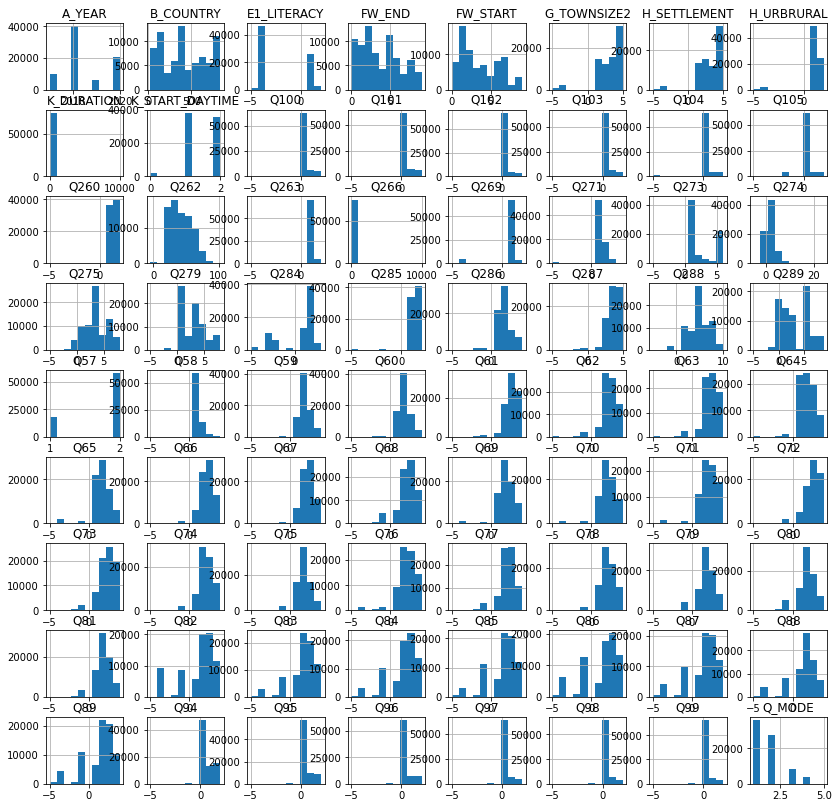

In [9]:
df.hist(figsize=(14,14))
plt.show()

In [ ]:
# encoder
encoder = OrdinalEncoder()
for i in df.columns:
    ordin = encoder.fit_transform(df[i].values.reshape(-1,1))
    df[i] = ordin
    df[i] = df[i].astype('int64')

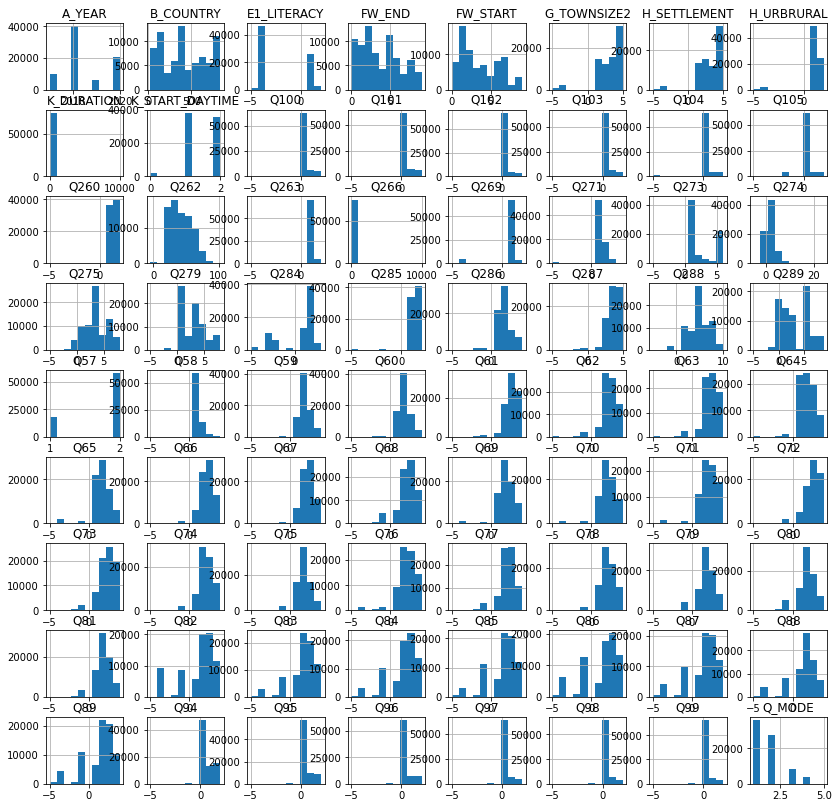

In [10]:
df.hist(figsize=(14,14))
plt.show()

In [11]:
pd.set_option("display.max_rows", 999)

In [12]:
# -Checking summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
B_COUNTRY,75956.0,418.431394,252.315605,20.0,158.0,398.0,642.0,840.0
A_YEAR,75956.0,2018.487295,1.018949,2017.0,2018.0,2018.0,2020.0,2020.0
FW_START,75956.0,3.449089,2.681726,0.0,1.0,3.0,6.0,9.0
FW_END,75956.0,3.643688,2.719020,0.0,1.0,3.0,6.0,9.0
K_DURATION,75956.0,79.105535,420.763180,-5.0,28.0,49.0,65.0,9999.0
Q_MODE,75956.0,1.748828,0.863299,1.0,1.0,2.0,2.0,5.0
G_TOWNSIZE2,75956.0,2.808626,2.010754,-5.0,2.0,3.0,4.0,5.0
H_SETTLEMENT,75956.0,2.936503,1.872251,-5.0,2.0,3.0,5.0,5.0
H_URBRURAL,75956.0,1.190531,0.975539,-5.0,1.0,1.0,2.0,2.0
E1_LITERACY,75956.0,-2.093936,2.486206,-5.0,-4.0,-4.0,1.0,2.0


In [13]:
# -We don't have any all unique or 1 unique columns
df.nunique()

B_COUNTRY            51
A_YEAR                4
FW_START             10
FW_END               10
K_DURATION         1148
Q_MODE                5
G_TOWNSIZE2           7
H_SETTLEMENT          7
H_URBRURAL            4
E1_LITERACY           4
Q57                   2
Q58                   7
Q59                   7
Q60                   7
Q61                   7
Q62                   7
Q63                   7
Q64                   7
Q65                   8
Q66                   7
Q67                   7
Q68                   7
Q69                   8
Q70                   8
Q71                   8
Q72                   7
Q73                   7
Q74                   7
Q75                   7
Q76                   8
Q77                   7
Q78                   7
Q79                   7
Q80                   7
Q81                   7
Q82                   8
Q83                   8
Q84                   8
Q85                   8
Q86                   8
Q87                   8
Q88             

In [14]:
for i in df.columns:
    print(df[i].value_counts(normalize=True))
    print('*'*40)

124    0.052899
360    0.042116
156    0.039615
840    0.034059
792    0.031202
344    0.027200
68     0.026950
702    0.026305
586    0.026055
36     0.023593
643    0.023237
484    0.022855
76     0.022776
170    0.020012
364    0.019696
276    0.019511
764    0.018761
604    0.018366
458    0.017286
392    0.016865
804    0.016536
410    0.016391
642    0.016299
566    0.016194
231    0.016141
158    0.016101
398    0.016036
716    0.015983
320    0.015838
104    0.015799
558    0.015799
704    0.015799
422    0.015799
762    0.015799
50     0.015785
608    0.015759
818    0.015759
400    0.015746
417    0.015667
300    0.015641
218    0.015496
368    0.015456
788    0.015430
630    0.014693
688    0.013547
554    0.013231
20     0.013179
152    0.012823
446    0.012744
196    0.012639
32     0.012534
Name: B_COUNTRY, dtype: float64
****************************************
2018    0.529004
2020    0.268234
2017    0.125968
2019    0.076794
Name: A_YEAR, dtype: float64
**************

## Model Building

In [15]:
#Separating the target variable and other variables
Y = df.Q57
X = df.drop(['Q57'],axis=1)

In [16]:
#Splitting the data (data is not big, so we take 15% and 42 randome state to be reproducable)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.15,random_state=42,stratify=Y)

In [17]:
# Almost the same importance for recall, accuracy and precision
# let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model
#creating metric function 

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Attriate', 'Attriate'], yticklabels=['Not Attriate', 'Attriate'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

If the frequency of class A is 77% and the frequency of class B is 23%, then class B will become the dominant class, and the decision tree will become biased toward the dominant classes.

Class_weight is a hyperparameter for the decision tree classifier, and in this case, we can pass a dictionary {0:0.77,1:0.23} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

In [20]:
# df['Q57'].value_counts()

In [21]:
#building decision tree
dt = DecisionTreeClassifier(class_weight={2:0.77,1:0.23}, random_state=42)

In [22]:
#fitting decision tree
dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={1: 0.23, 2: 0.77},
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=42, splitter='best')

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     15104
           2       1.00      1.00      1.00     49458

    accuracy                           1.00     64562
   macro avg       1.00      1.00      1.00     64562
weighted avg       1.00      1.00      1.00     64562



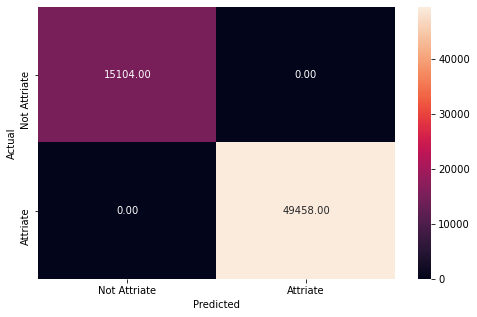

In [23]:
#checking performance on train dataset
y_train_pred_dt=dt.predict(x_train)
metrics_score(y_train,y_train_pred_dt)

              precision    recall  f1-score   support

           1       0.45      0.48      0.46      2666
           2       0.84      0.82      0.83      8728

    accuracy                           0.74     11394
   macro avg       0.64      0.65      0.65     11394
weighted avg       0.75      0.74      0.74     11394



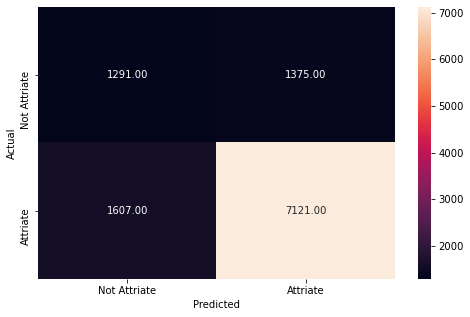

In [24]:
#checking performance on test dataset
y_test_pred_dt=dt.predict(x_test)
metrics_score(y_test,y_test_pred_dt)

// comments

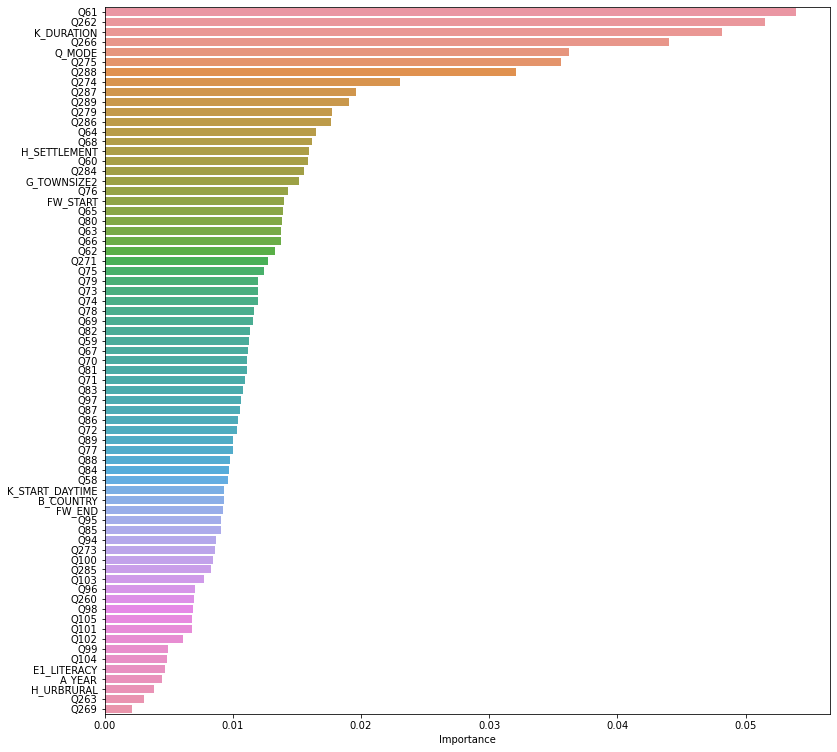

In [25]:
#plot the feature importance
importances = dt.feature_importances_
columns=X.columns
importance_df=pd.DataFrame(importances,index=columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
plt.figure(figsize=(13,13))
sns.barplot(importance_df.Importance,importance_df.index)

### Observations
-- According to the Decision Tree, trust in people meet for the first time is the most important feature, followed by being a citizen of the country, age and, surprisingly, survey duration.

-- The first two almost trivially true, while the fact that younger people are more trusting, or that people answering faster where more likly to be trusting are very interesting findings.

## Tuning Models
### Using GridSearch for Hyperparameter Tuning on the model
Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.
It is an exhaustive search that is performed on the specific parameter values of a model.
The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.
### Criterion{“gini”, “entropy”}

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

### max_depth

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

### min_samples_leaf

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

In [42]:
# Choose the type of classifier 
dtree_estimator = DecisionTreeClassifier(class_weight={2:0.77,1:0.23}, random_state=42)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,20), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25, 50, 100, 200]
             }


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(f1_score, pos_label=1)

# Run the grid search
gridCV= GridSearchCV(dtree_estimator, parameters, scoring=scorer,cv=10)
gridCV = gridCV.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
dtree_estimator = gridCV.best_estimator_

              precision    recall  f1-score   support

           1       0.94      0.53      0.68     15104
           2       0.87      0.99      0.93     49458

    accuracy                           0.88     64562
   macro avg       0.91      0.76      0.80     64562
weighted avg       0.89      0.88      0.87     64562



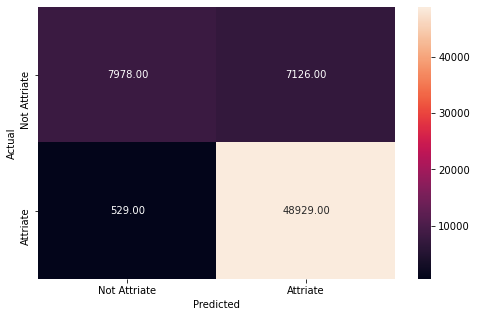

In [43]:
y_train_pred_dt=dtree_estimator.predict(x_train)
metrics_score(y_train,y_train_pred_dt)

              precision    recall  f1-score   support

           1       0.58      0.32      0.41      2666
           2       0.82      0.93      0.87      8728

    accuracy                           0.79     11394
   macro avg       0.70      0.62      0.64     11394
weighted avg       0.76      0.79      0.76     11394



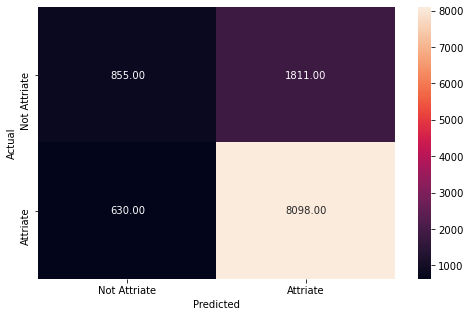

In [44]:
y_test_pred_dt=dtree_estimator.predict(x_test)
metrics_score(y_test,y_test_pred_dt)

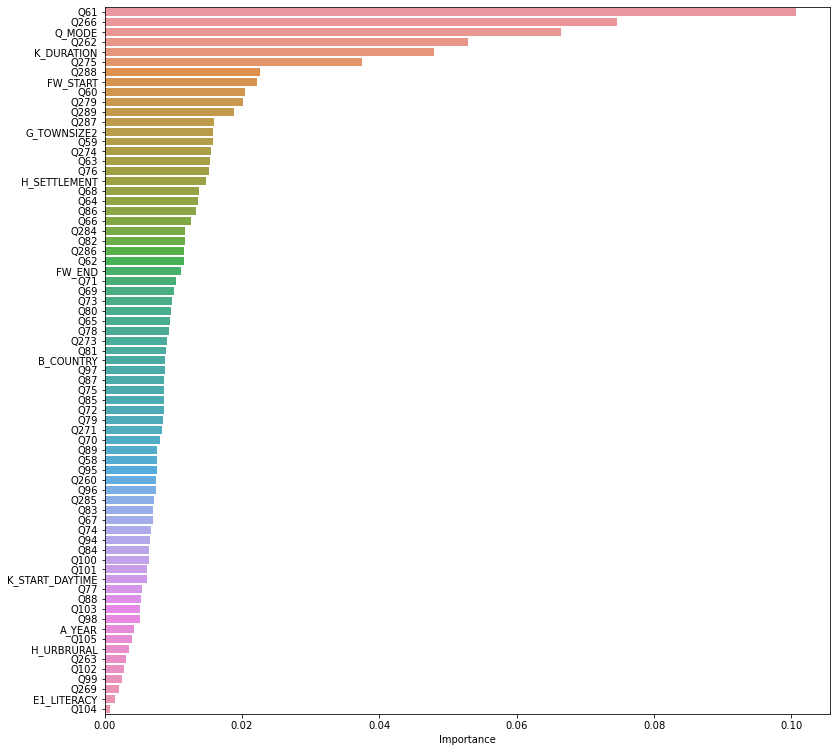

In [45]:
importances = dtree_estimator.feature_importances_
columns=X.columns
importance_df=pd.DataFrame(importances,index=columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
plt.figure(figsize=(13,13))
sns.barplot(importance_df.Importance,importance_df.index)

-- After tuning the model we are getting that only 3 features are important. It seems like the model is having high bias, as it has over-simplified the problem and is not capturing the patterns associated with other variables.

-- According to this model, Q61, Q269 and Q_Mode are the 3 most important features that describe a person to be more trusting.

In [ ]:
features = list(X.columns)

plt.figure(figsize=(30,20))

tree.plot_tree(dt,max_depth=4,feature_names=features,filled=True,fontsize=12,node_ids=True,class_names=True)
plt.show()

In [40]:
# Choose the type of classifier 
dtree_estimator = DecisionTreeClassifier(class_weight={2:0.77,1:0.23}, random_state=42)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,7), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25, 50, 100, 200]
             }


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label=1)

# Run the grid search
gridCV= GridSearchCV(dtree_estimator, parameters, scoring=scorer,cv=10)
gridCV = gridCV.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
dtree_estimator = gridCV.best_estimator_

              precision    recall  f1-score   support

           1       0.82      0.12      0.22      2666
           2       0.79      0.99      0.88      8728

    accuracy                           0.79     11394
   macro avg       0.81      0.56      0.55     11394
weighted avg       0.80      0.79      0.72     11394



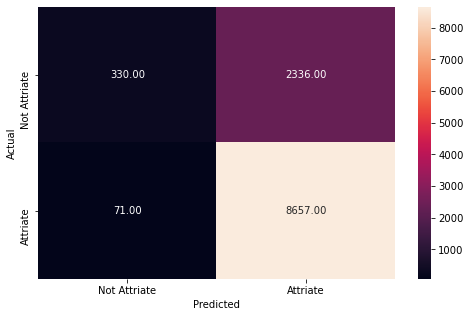

In [41]:
y_test_pred_dt=dtree_estimator.predict(x_test)
metrics_score(y_test,y_test_pred_dt)

### Running on other columns

In [ ]:
df.columns

In [ ]:
df_desc = df[['B_COUNTRY','A_YEAR','FW_START','FW_END','K_DURATION','Q_MODE','G_TOWNSIZE2',
              'H_SETTLEMENT','Q57','Q260','Q262','Q263','Q266','Q269','Q271','Q273','Q274',
              'Q275','Q279','Q284','Q285','Q286','Q287','Q288','Q289']]

In [ ]:
#Separating the target variable and other variables
Y1 = df_desc.Q57
X1 = df_desc.drop(['Q57'],axis=1)

In [ ]:
#Splitting the data (data is not big, so we take 15% and 42 randome state to be reproducable)
x1_train,x1_test,y1_train,y1_test=train_test_split(X1,Y1,test_size=0.15,random_state=42,stratify=Y1)

In [ ]:
#building decision tree
dt_desc = DecisionTreeClassifier(class_weight={0:0.77,1:0.23}, random_state=42)

In [ ]:
#fitting decision tree
dt_desc.fit(x1_train, y1_train)

In [ ]:
#checking performance on train dataset
y1_train_pred_dt=dt_desc.predict(x1_train)
metrics_score(y1_train,y1_train_pred_dt)

In [ ]:
#checking performance on test dataset
y1_test_pred_dt=dt_desc.predict(x1_test)
metrics_score(y1_test,y1_test_pred_dt)

### Running on top columns

In [ ]:
df_top = df[['Q61','Q269','Q262','K_DURATION','B_COUNTRY','FW_START','Q_MODE','Q288','G_TOWNSIZE2',
              'H_SETTLEMENT','Q57','Q275','Q59','Q289','Q274','Q279','Q60','Q63','Q266','Q62','Q64',
             'Q286','Q287','Q71','Q284']]

In [ ]:
#Separating the target variable and other variables
Y2 = df_top.Q57
X2 = df_top.drop(['Q57'],axis=1)

In [ ]:
#Splitting the data (data is not big, so we take 15% and 42 randome state to be reproducable)
x2_train,x2_test,y2_train,y2_test=train_test_split(X2,Y2,test_size=0.15,random_state=42,stratify=Y2)

In [ ]:
#building decision tree
dt_top = DecisionTreeClassifier(class_weight={0:0.77,1:0.23}, random_state=42)

In [ ]:
#fitting decision tree
dt_top.fit(x2_train, y2_train)

In [ ]:
#checking performance on train dataset
y2_train_pred_dt=dt_top.predict(x2_train)
metrics_score(y2_train,y2_train_pred_dt)

In [ ]:
#checking performance on test dataset
y2_test_pred_dt=dt_top.predict(x2_test)
metrics_score(y2_test,y2_test_pred_dt)